### OVERVIEW

In [ ]:
# this is the general concept of clustering
# uses unlabeled data and make clusters
# we donot know actual true label of the data
# real data sets have more dimensions and more features
#  no unsupervised learning model can tell what the direct label of a cluster it is


# if we have deiscovered these new cluster labels, could we use theat as a y for supervised learning
#  yes we can use supervised learning to discover possible labels, then apply supervised on new datapoints
# there is a major trade-off
# clustering did not tell what the cluster is (the name of the cluster)
# or is the cluster even correct
#   its much harder to compare unsupervised models as we lack the performance metrics.
# we cant use the performance metrics of the supervised learning model it is difficult to compare the results of one unsupervised model to the other


### THEORY

In [1]:
# first set of properties that each point must satisfy
#     each point must belong to a cluster
#     each point can only belong to one cluster (no single point can belong to multiple clusters)

In [2]:
# step 1 => choose the number of clusters to create (this is the K value)
#    discussed in later section about how to choose optimal k value

# step 2 => Randomy select K disntinct data ponts

# step 3 => assign each remaining point to the nearest "cluster" point (we are just using the distance metrics)

# ----------- Now we iterate and improve the clustering process------------

# step 4 => calculate the centre of the cluster points (mean value of each point vector)

# step 5 => Now assign each point to the nearest cluster center

# ----------- we repeat step 4 and 5------------

### CODING

##### PART 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('bank-full.csv')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='age', ylabel='Count'>

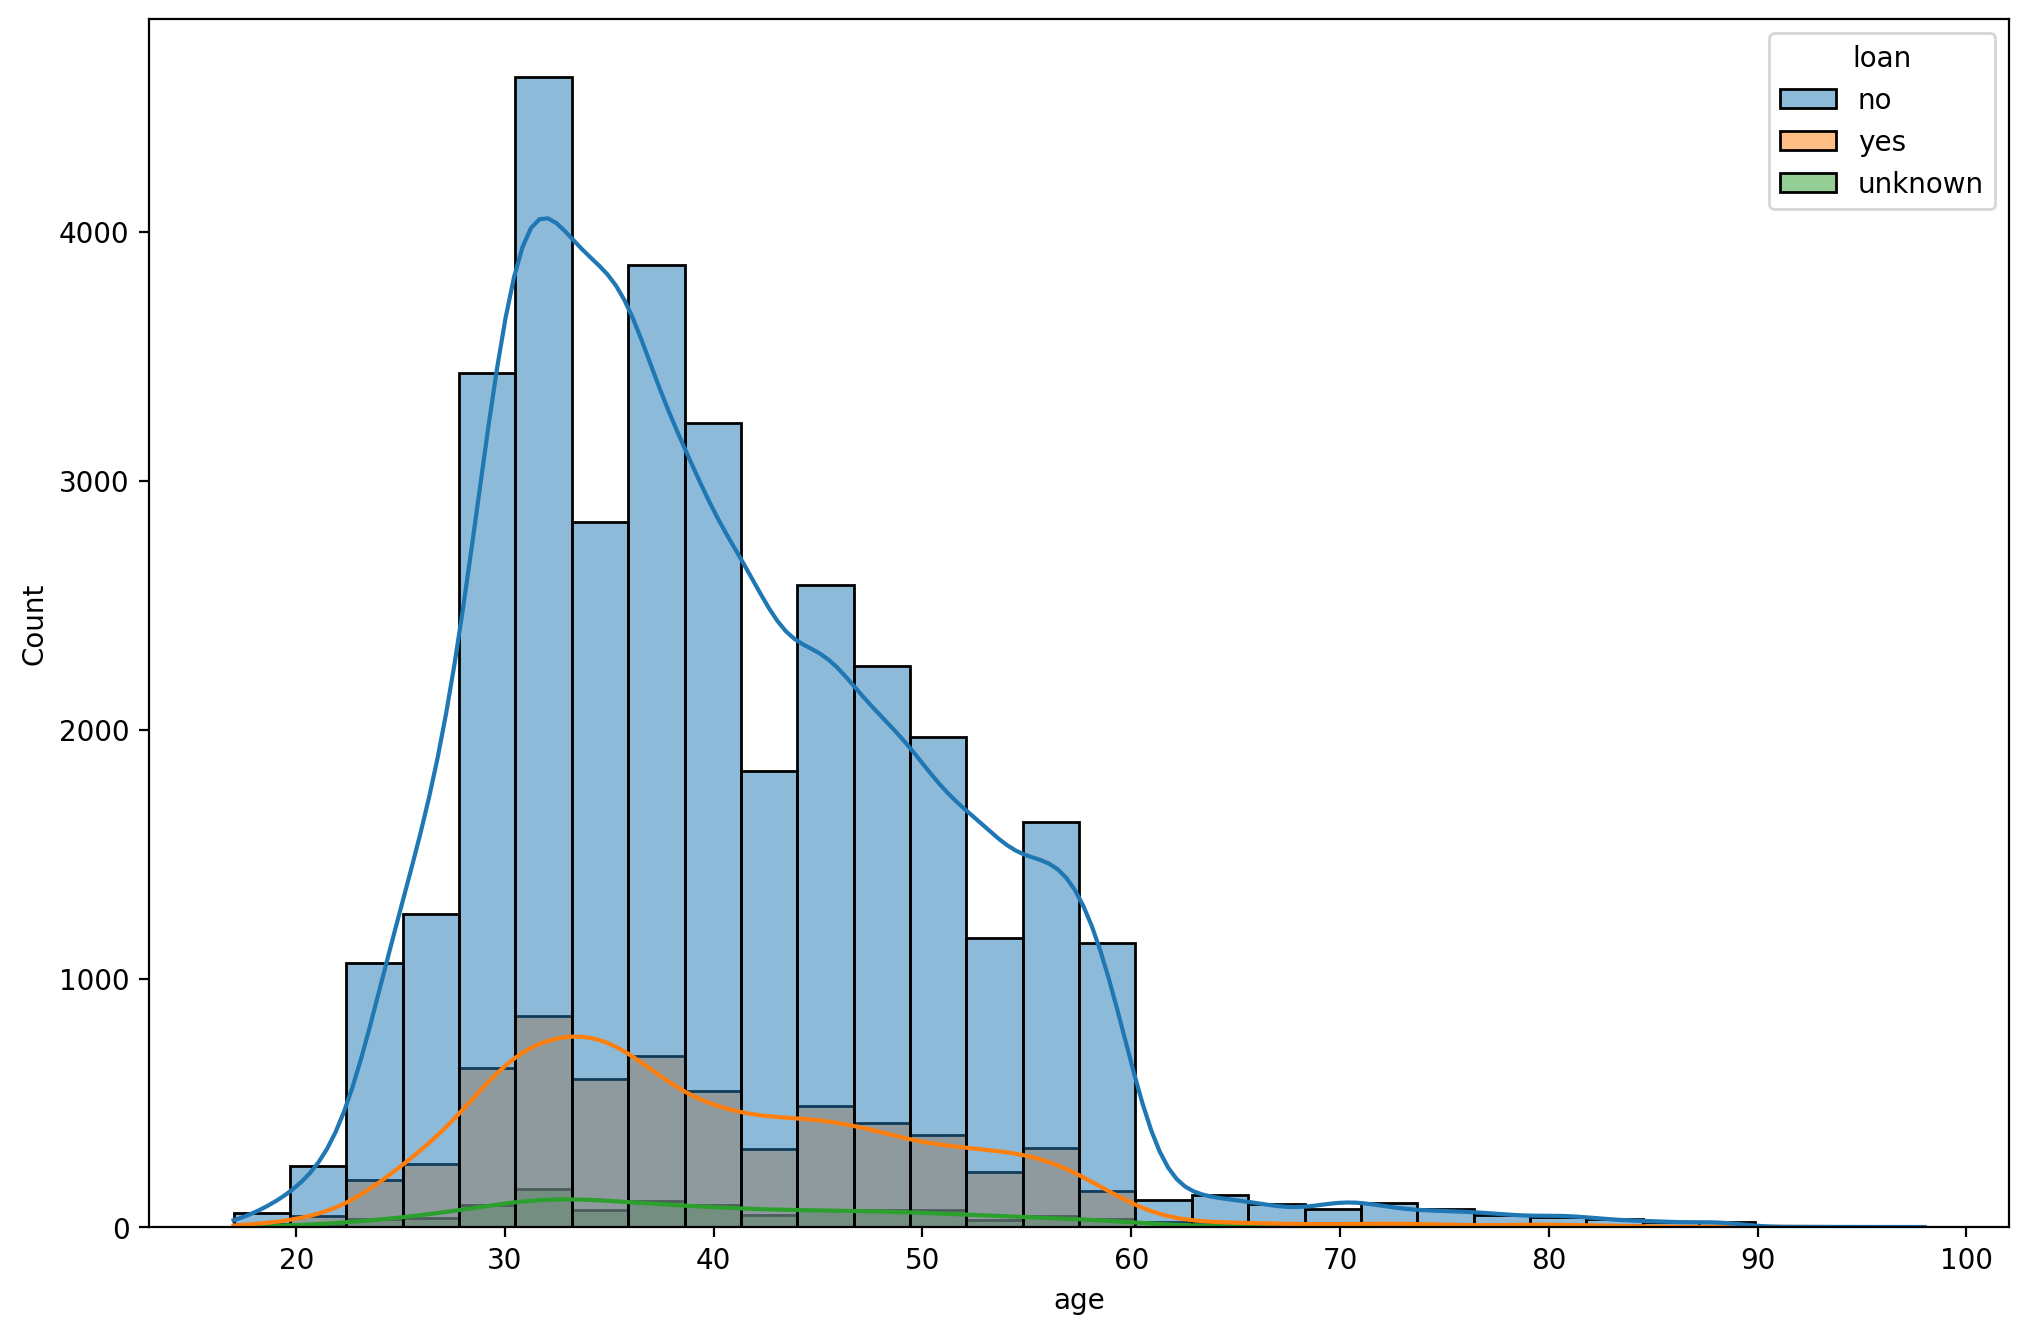

In [14]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(data=df, x='age', bins=30, kde=True, hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

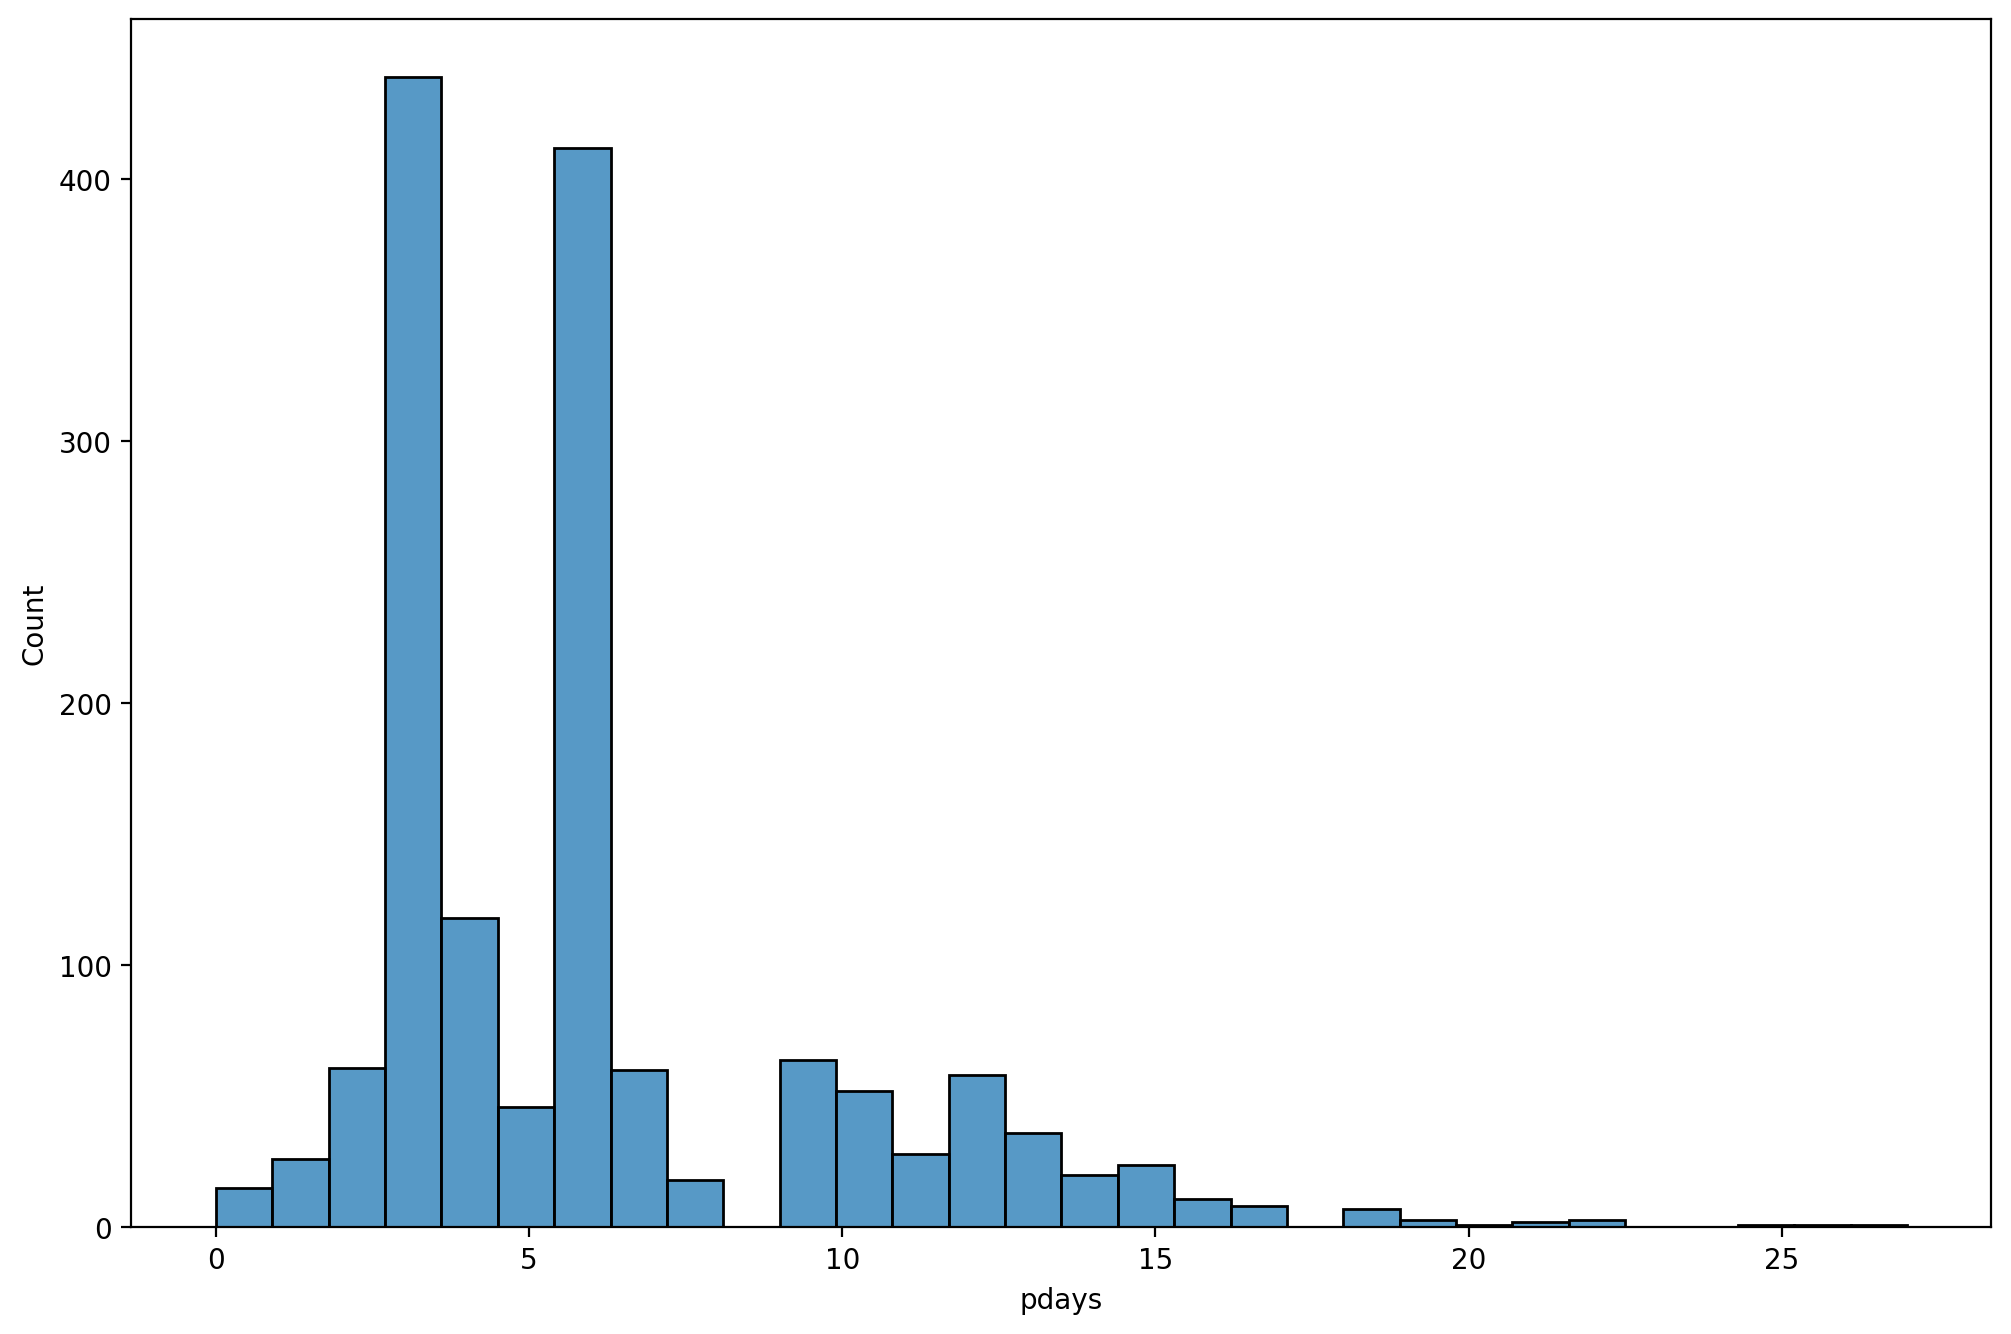

In [21]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays', bins=30)

<AxesSubplot:xlabel='duration', ylabel='Count'>

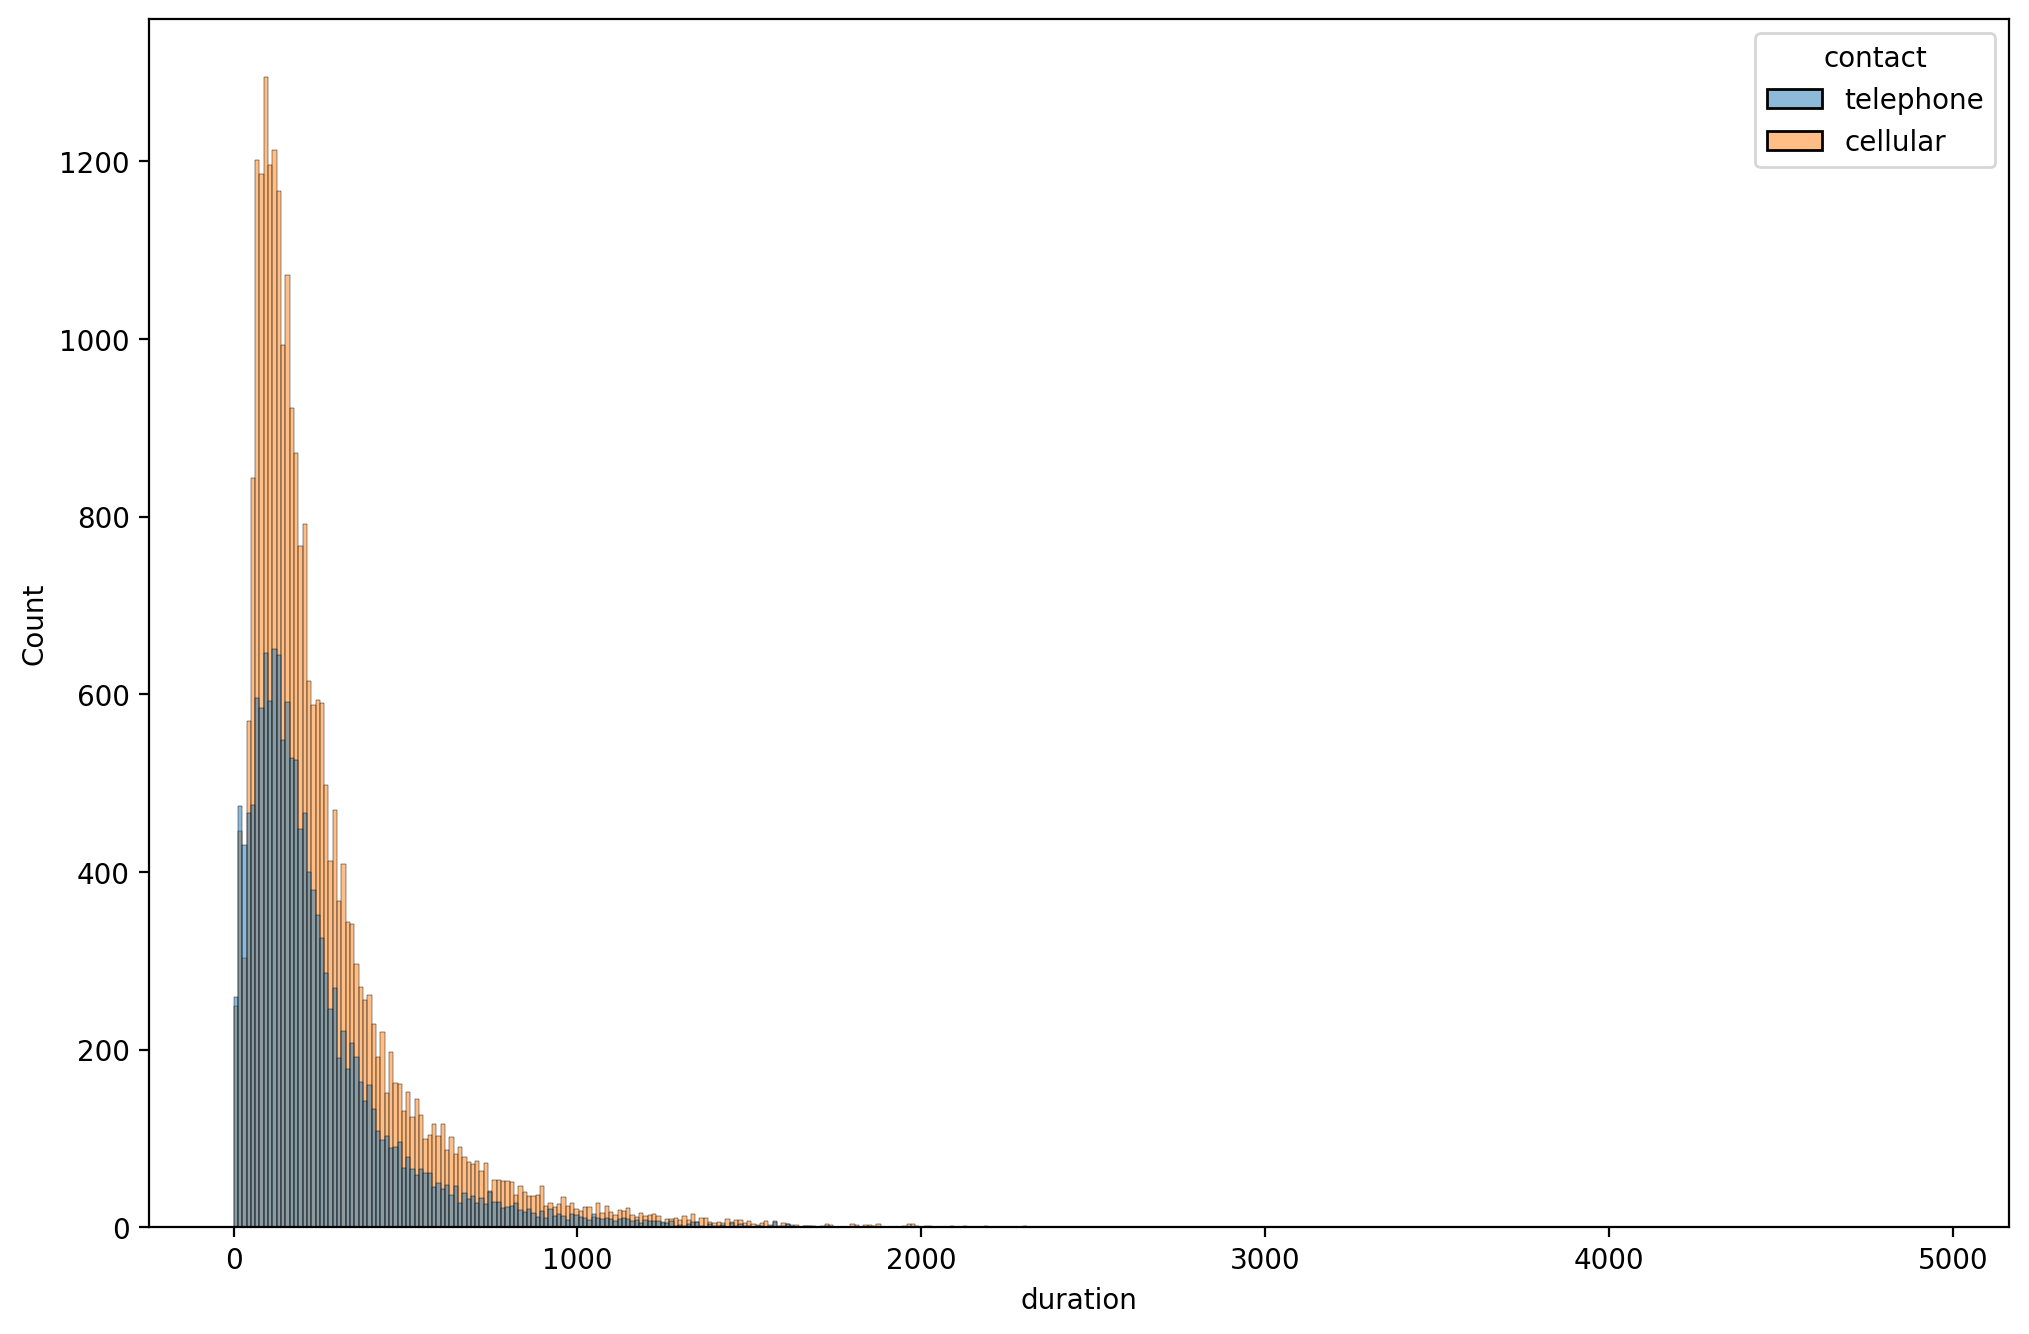

In [24]:
plt.figure(figsize=(12,8), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')

<AxesSubplot:xlabel='contact', ylabel='count'>

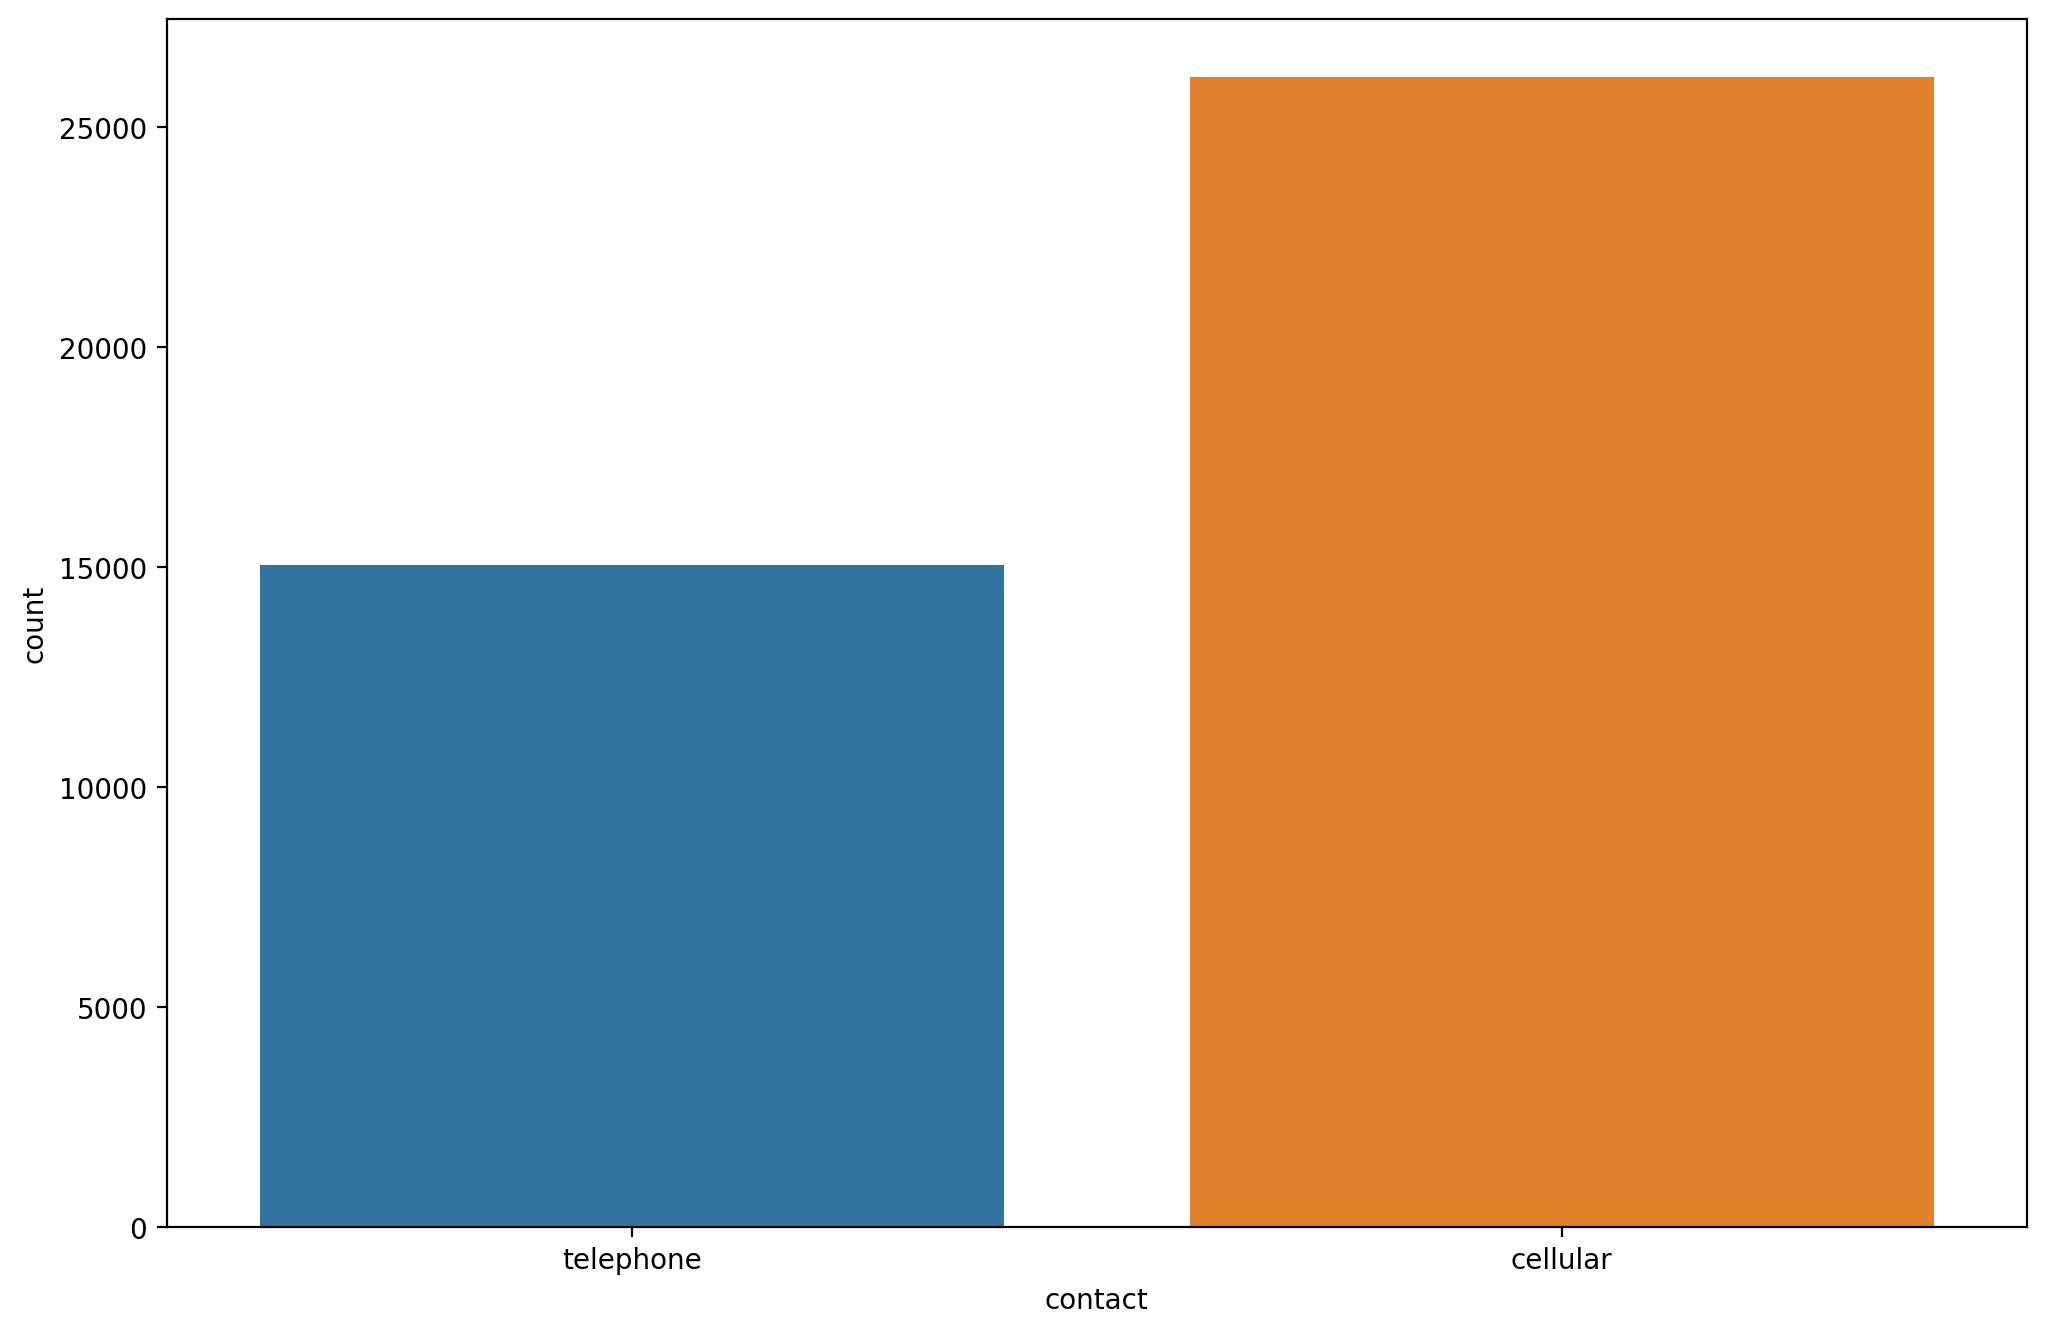

In [26]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='contact')

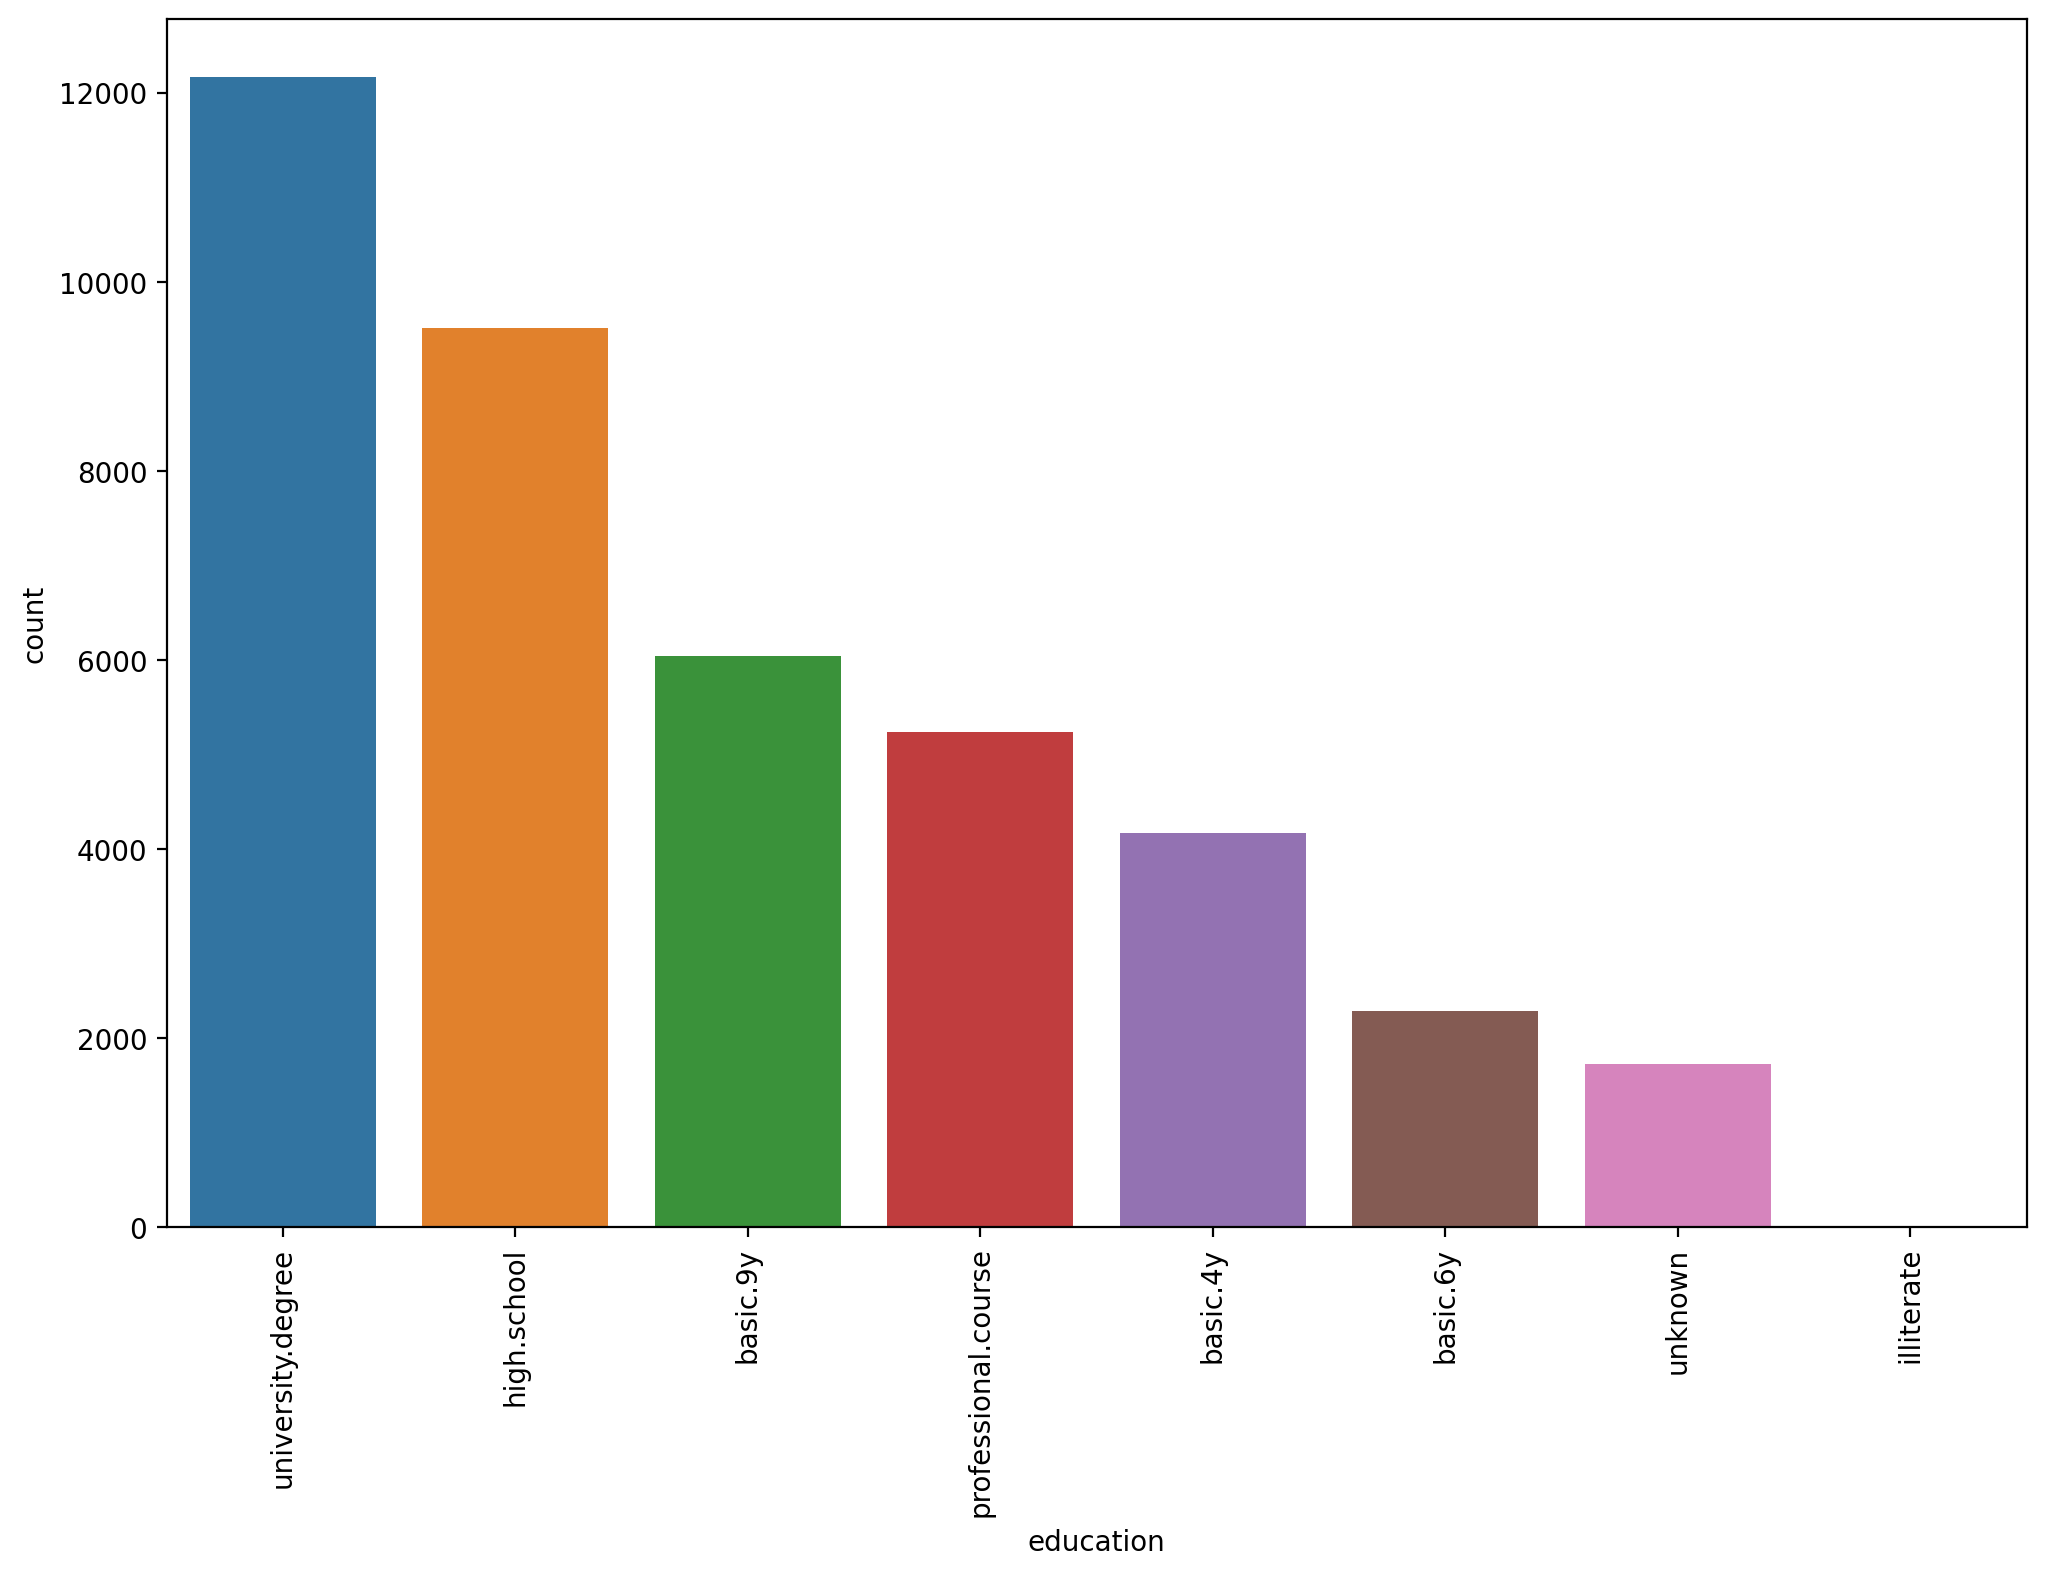

In [41]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

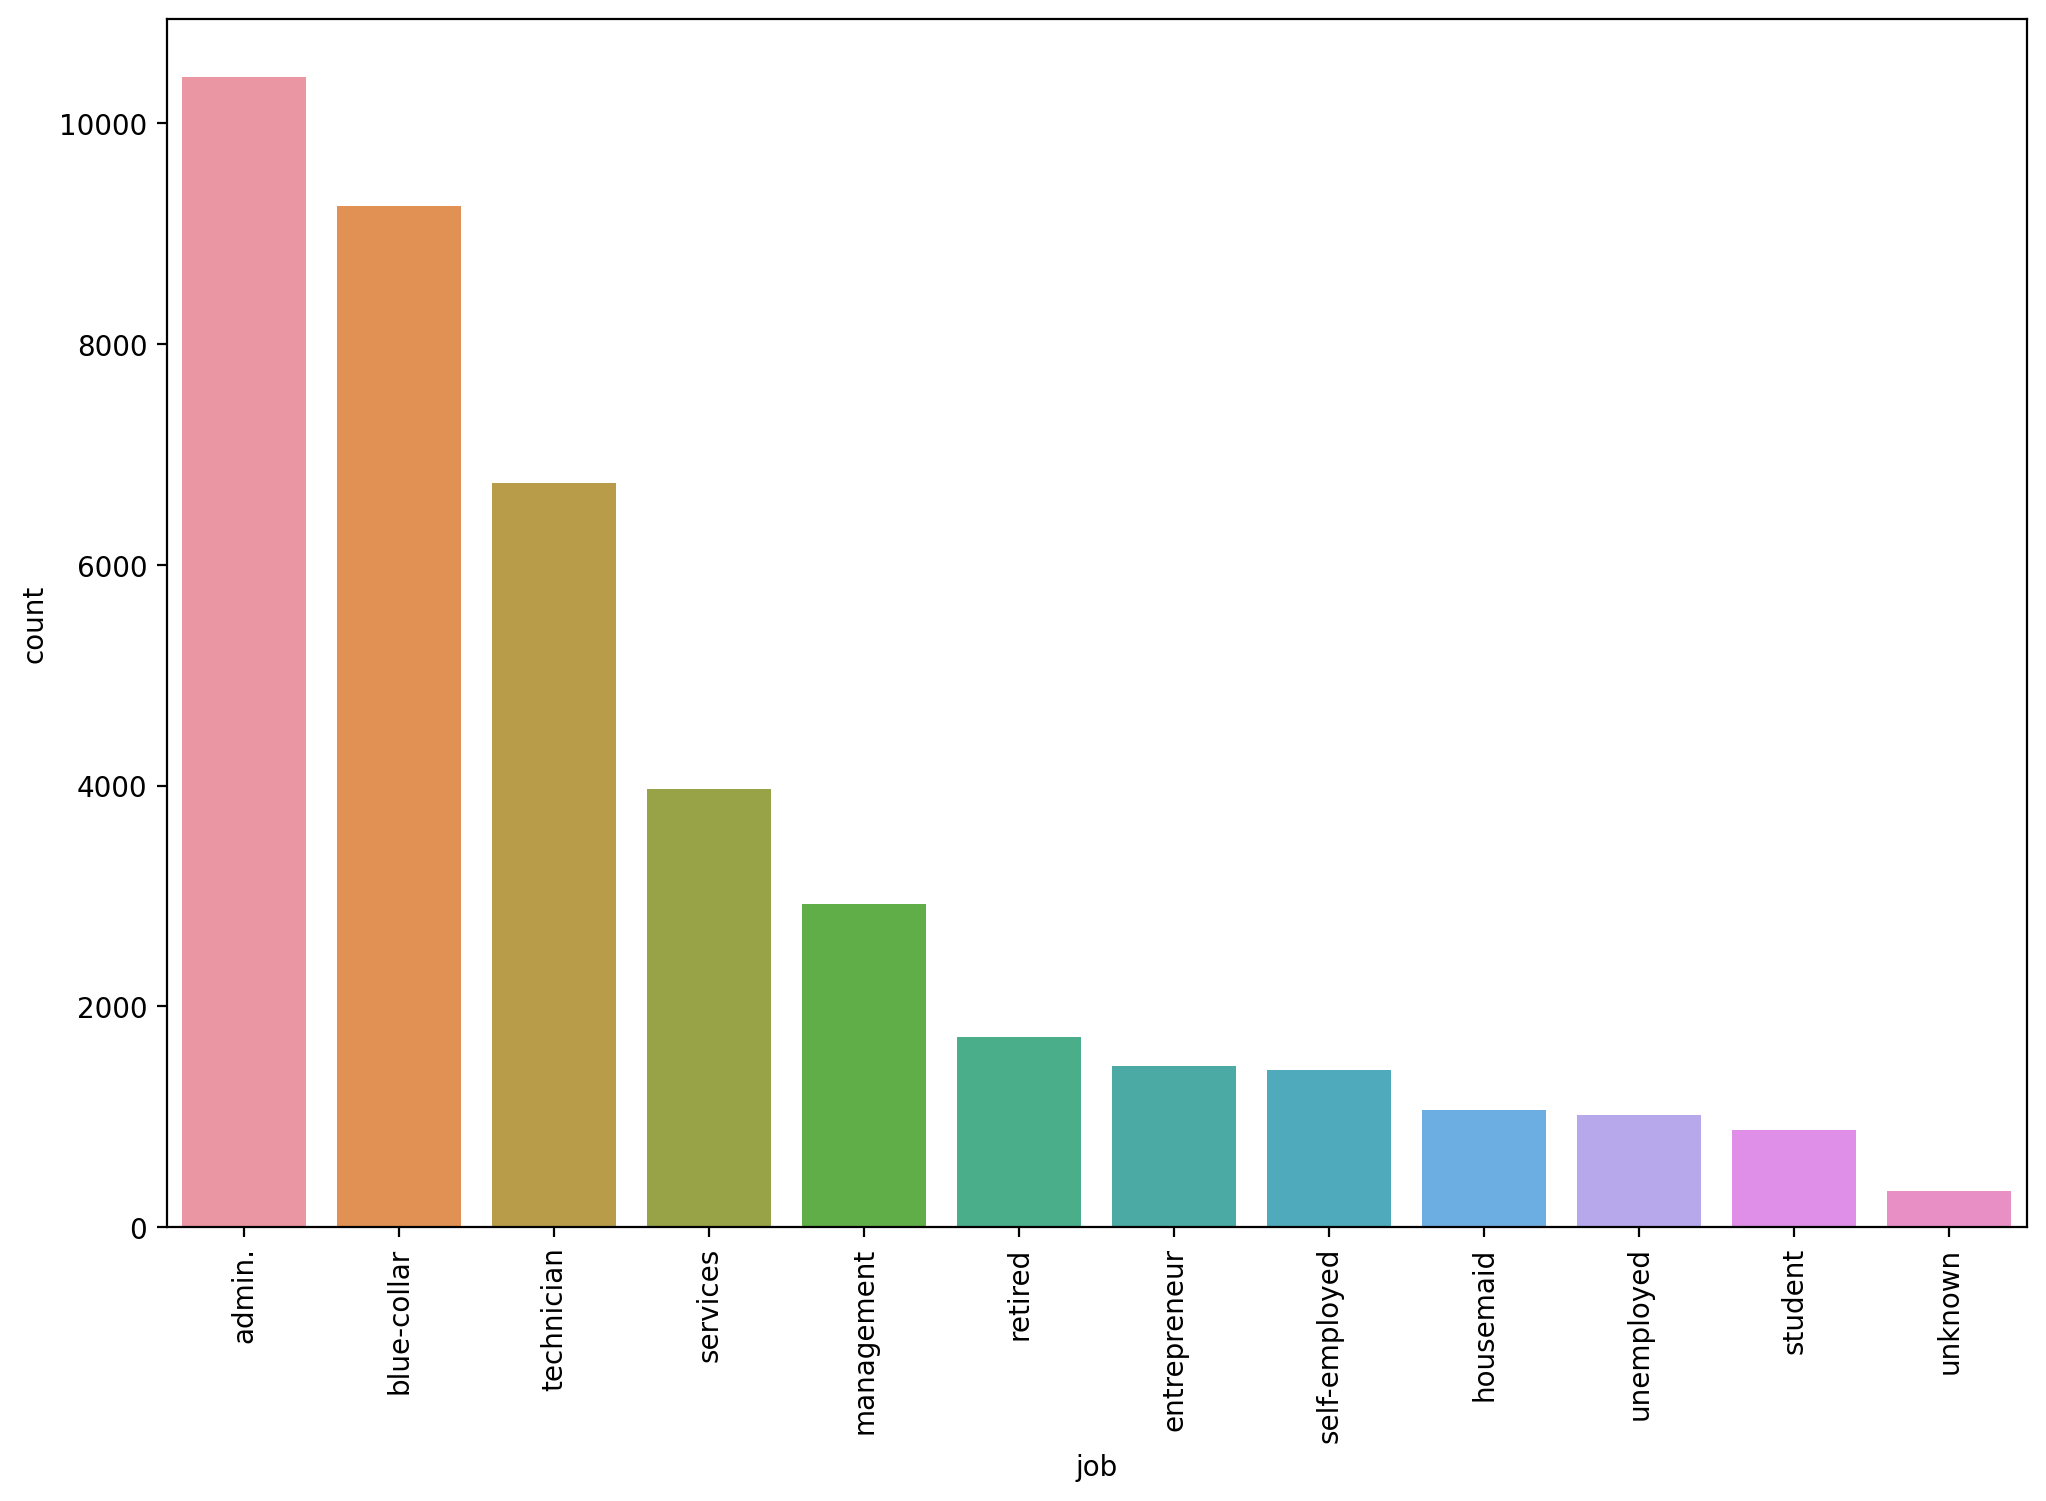

In [42]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

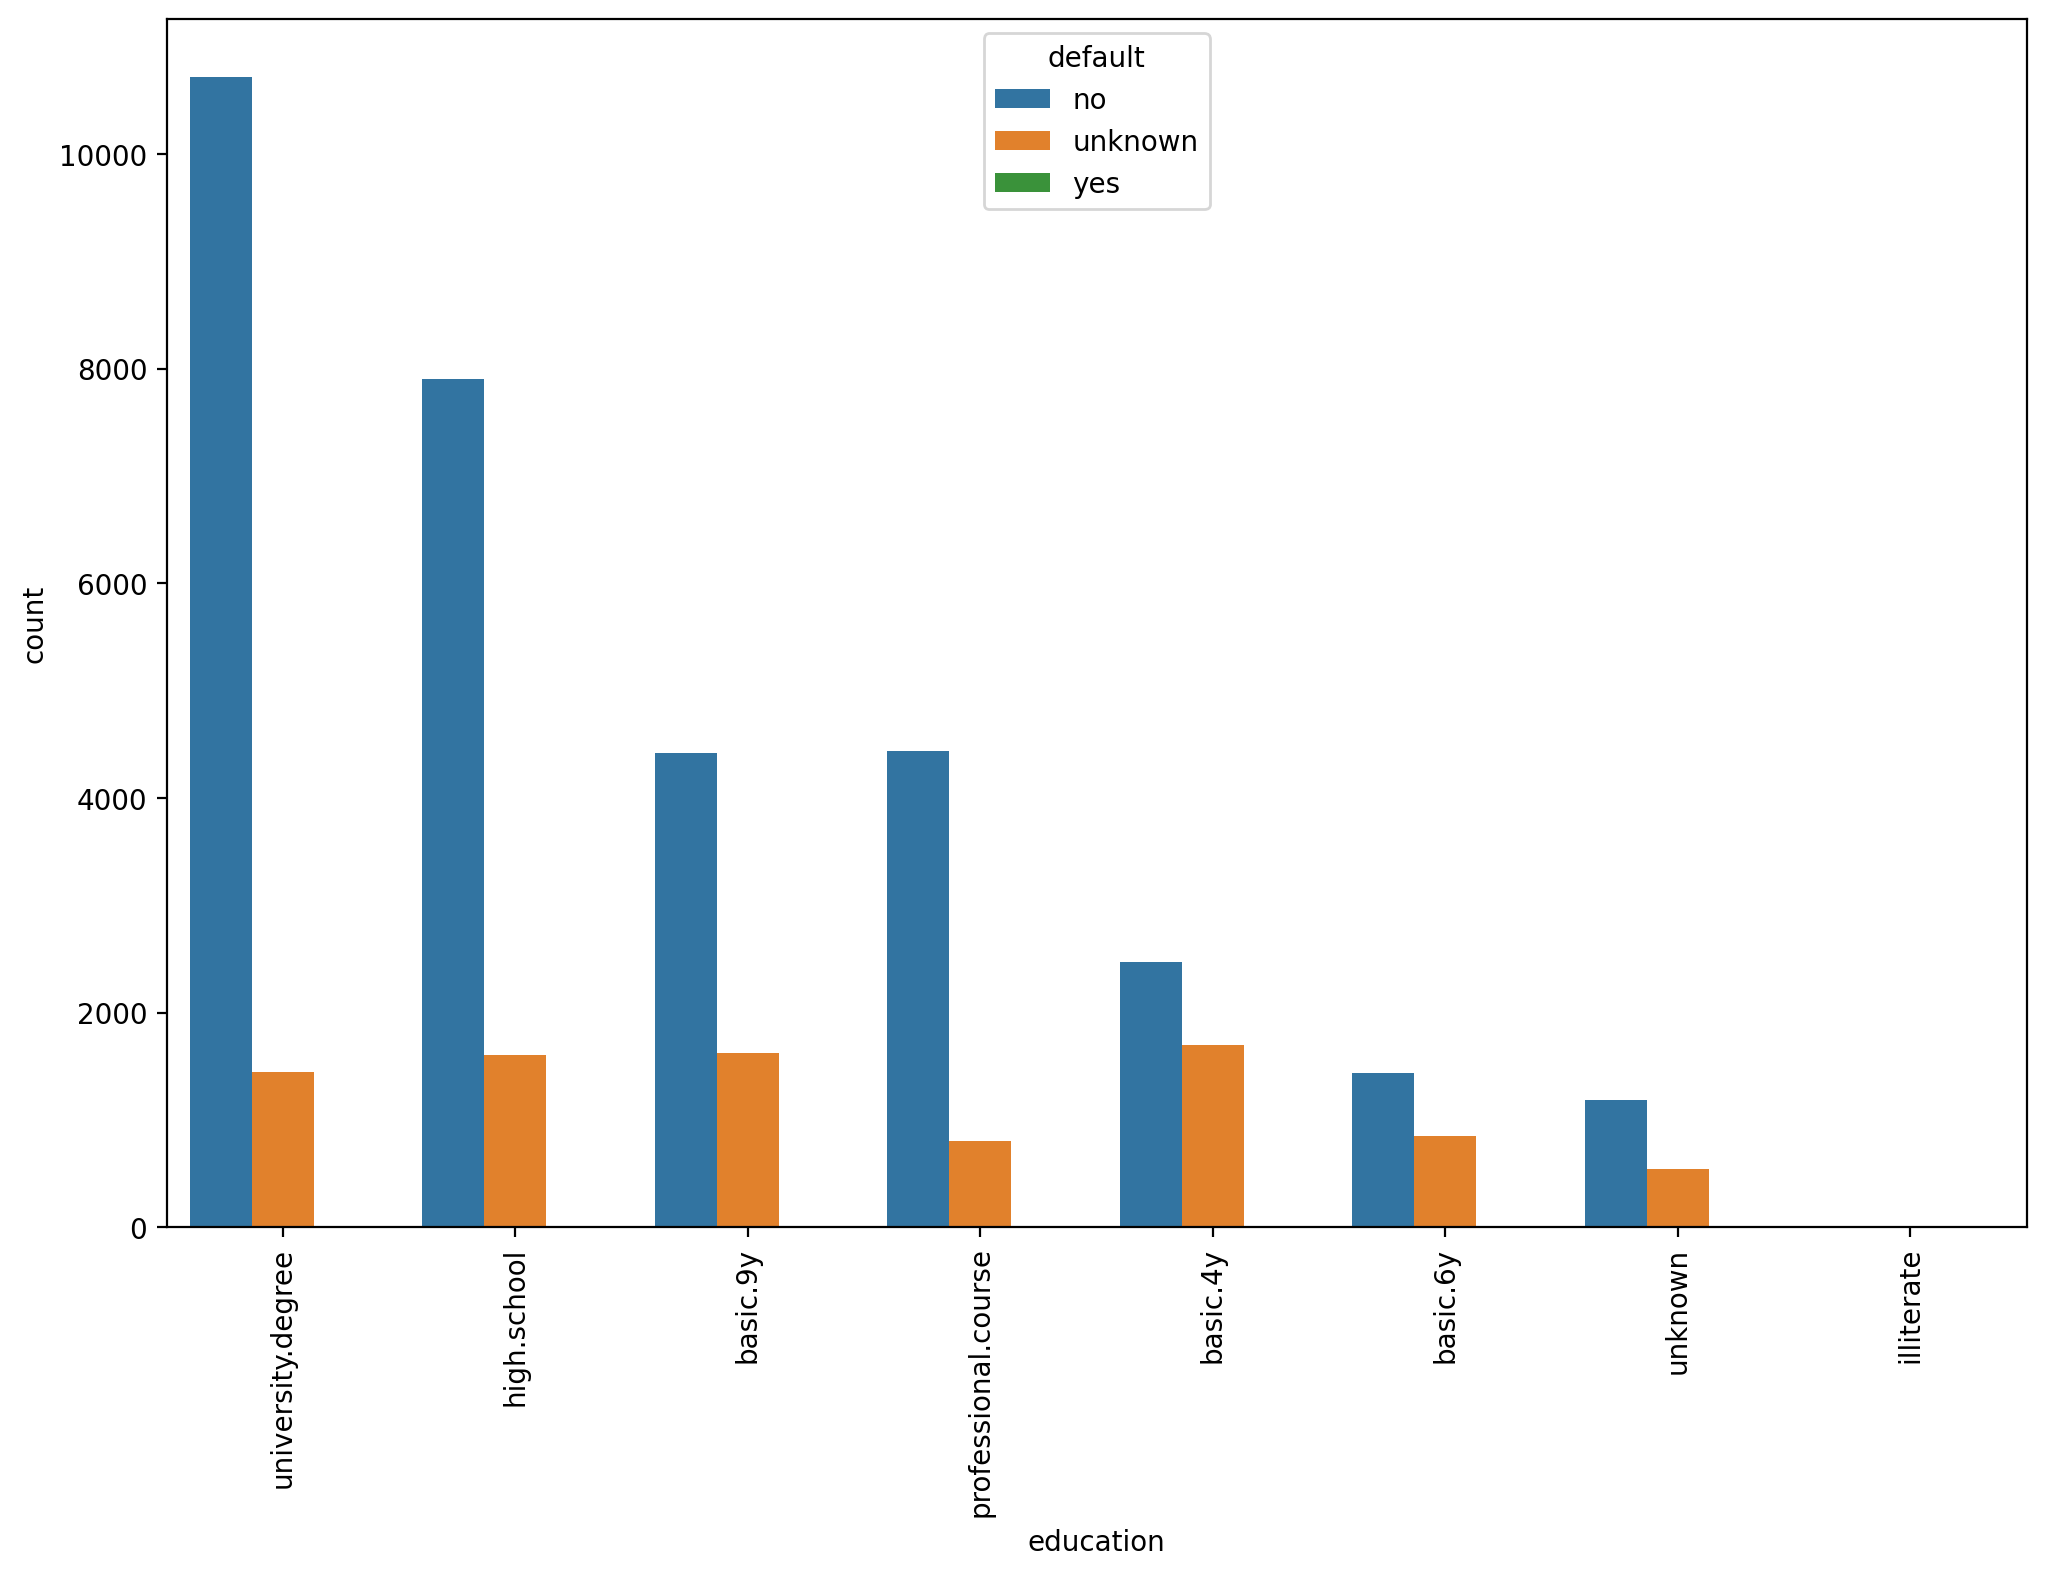

In [43]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

In [44]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

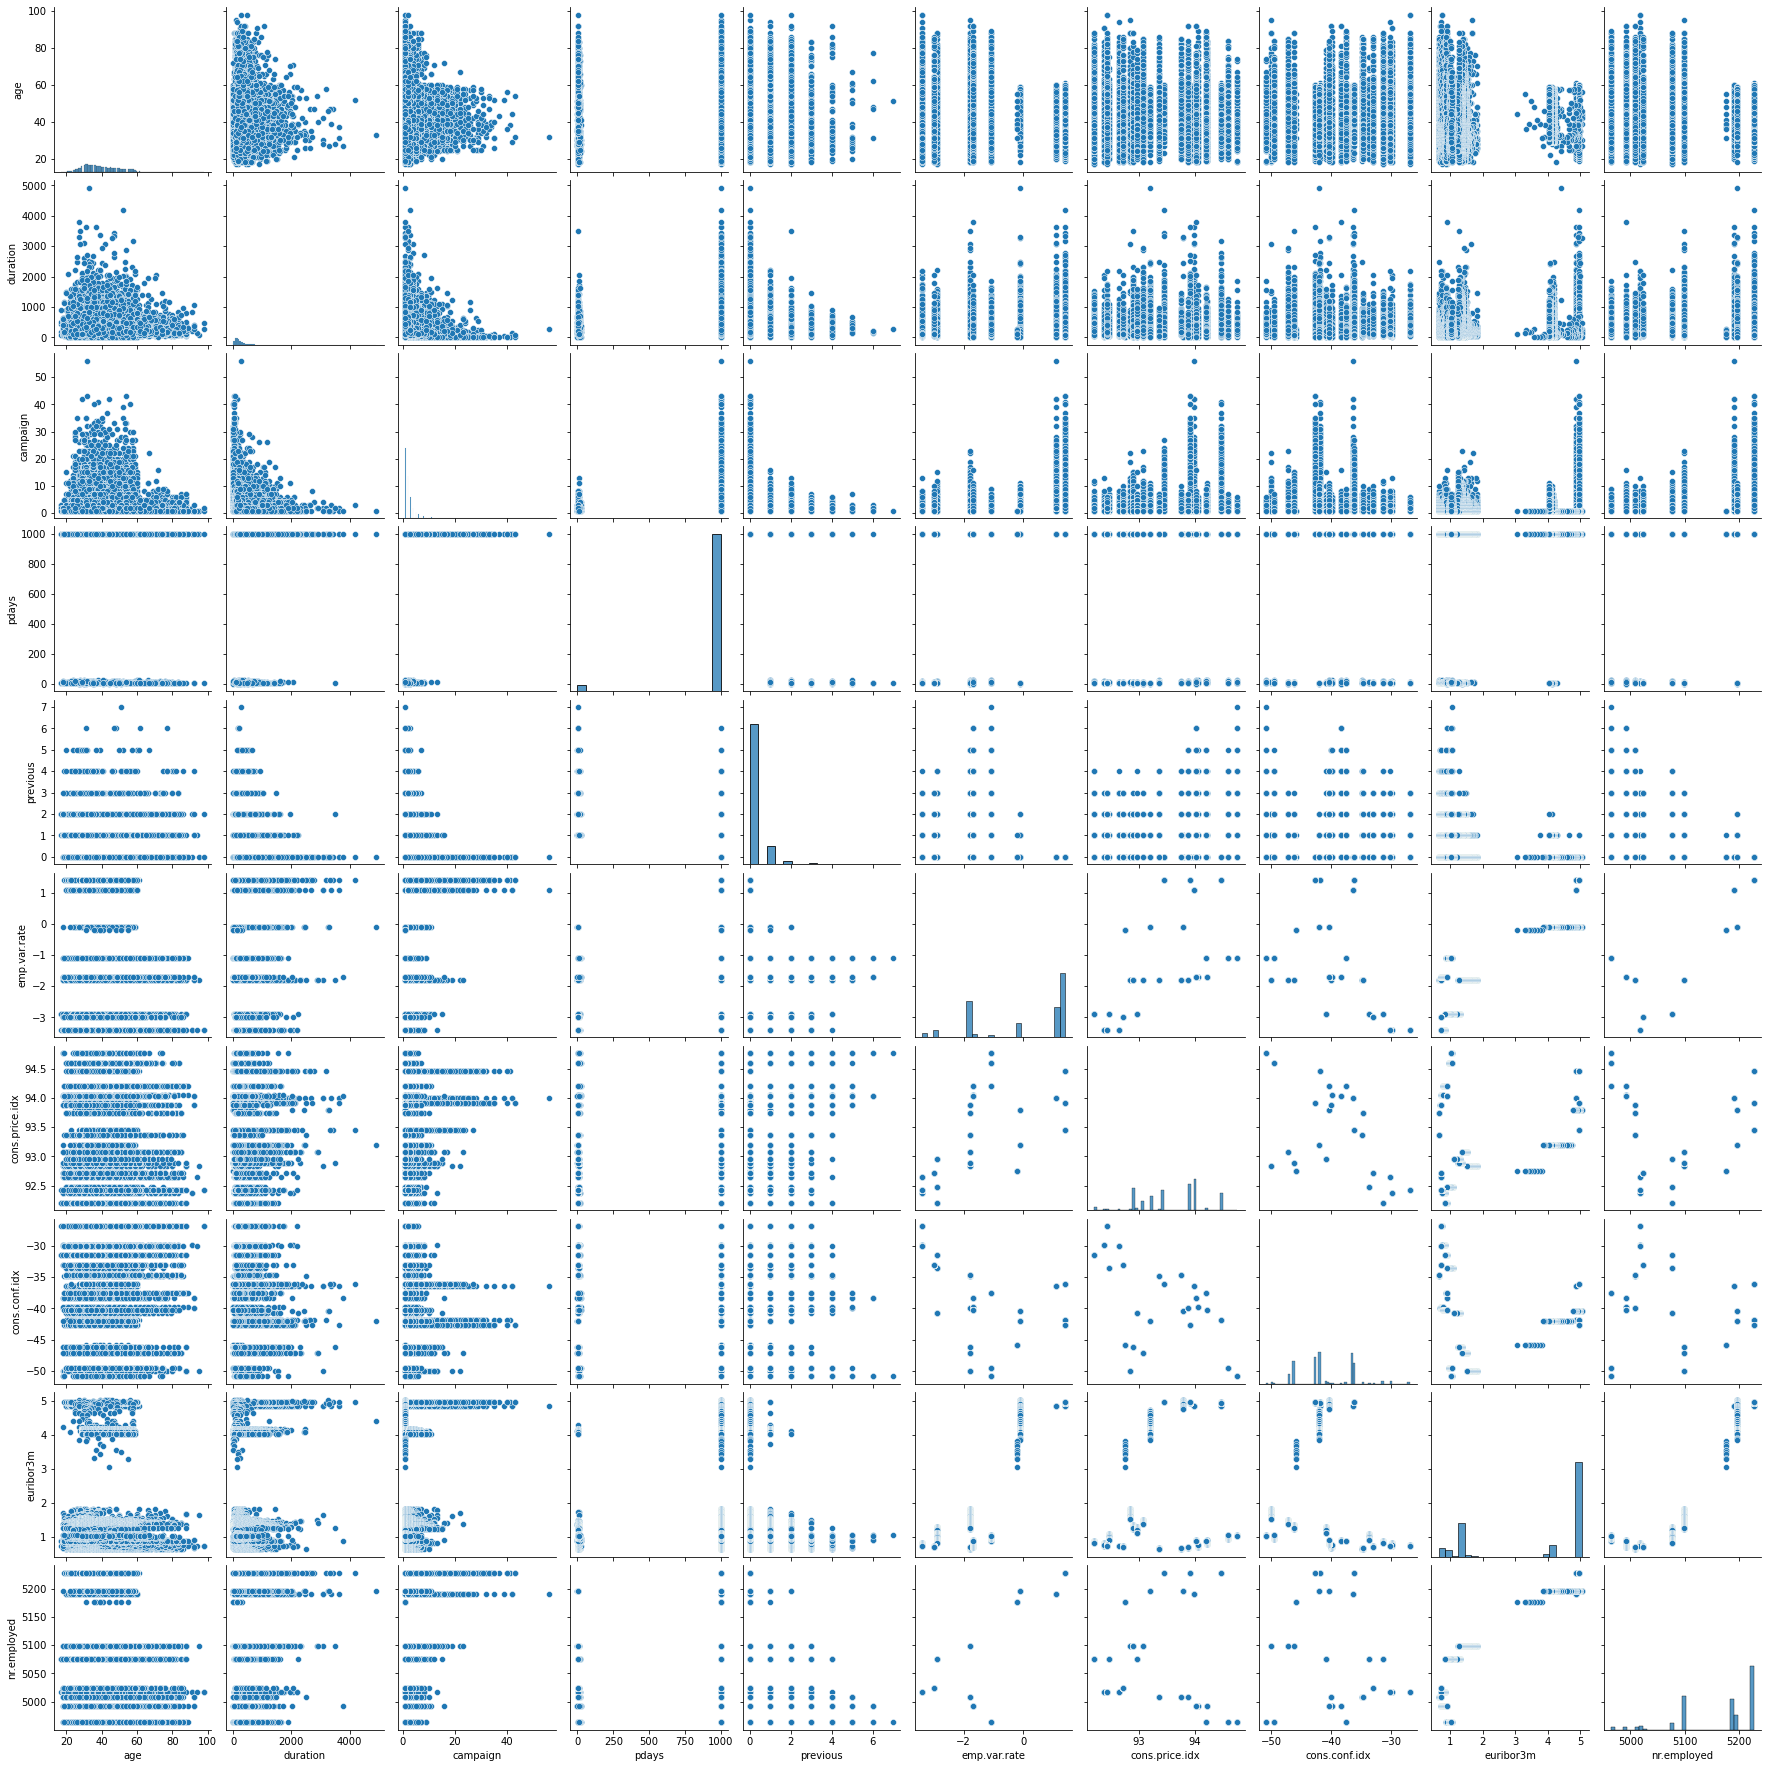

In [45]:
sns.pairplot(df)

##### PART 2

In [47]:
# we cannot use the categorical data because everything would be on the distace metrics
# so we need to create numeric data from teh categorical data

In [48]:
X = pd.get_dummies(df)

In [49]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaled_X = scaler.fit_transform(X)

In [53]:
from sklearn.cluster import KMeans

In [55]:
# help(KMeans)

In [57]:
model = KMeans(n_clusters=2)

In [59]:
cluster_labels = model.fit_predict(scaled_X)

In [60]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
X['Cluster'] = cluster_labels

In [62]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,1


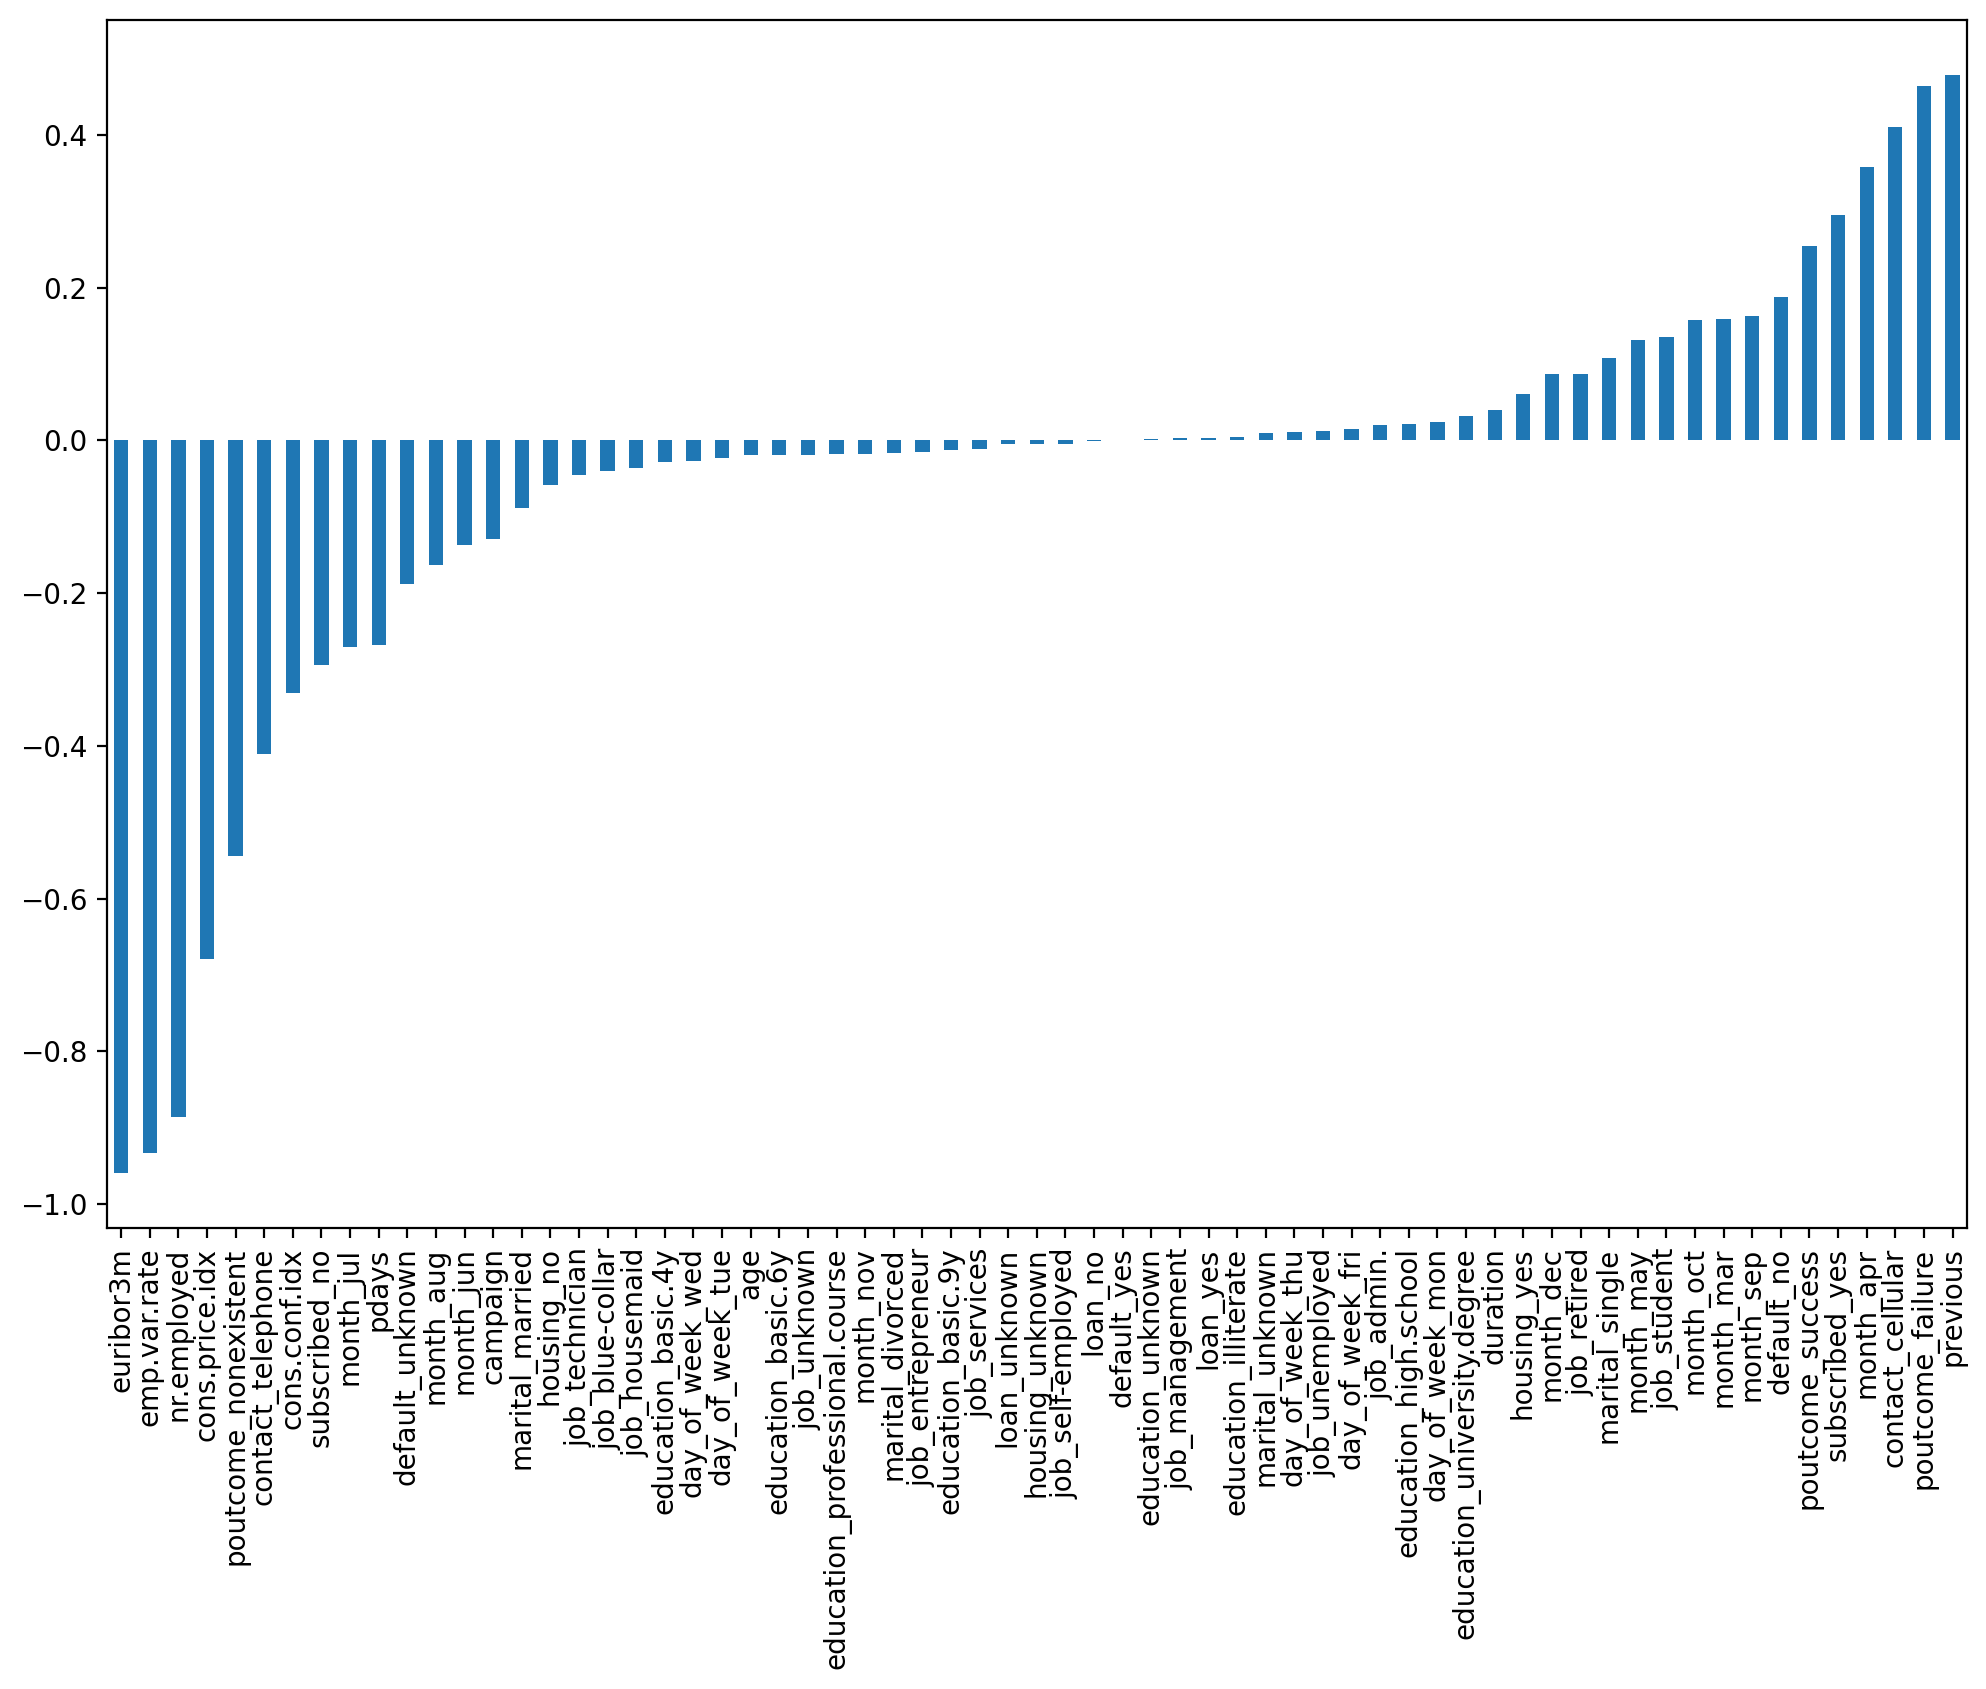

In [73]:
plt.figure(figsize=(12,8), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);

##### PART 3

In [74]:
# we measure the sum of the squared distances from the points to the cluster center
# then we fit the model with K+1
# we then measure again the sum of the squared distances again
# there will come a time when the SSD will go to zero once K is equal to the number of points
# because each k will be on the data point and thus haveing the distance zero from the point

# we keep track of SSD value for a range of different K values
# we then look for a K value where rate of reductioni in SSD begins to decline
# this signifies that adding an extra cluster is not obtaining enough clarity of the cluster seperation to justify increasing K.
# this is known as the 'elbow' method since we will track where decrease in SSD begins to flatten out copared to increasinf K values

In [76]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) # SSD point ---> cluster center

In [77]:
ssd

[2469792.361662749,
 2370786.888414876,
 2271503.4290299662,
 2200694.4189529633,
 2149009.4935815493,
 2074338.1374205085,
 2047335.8002312842,
 2010388.313186341]

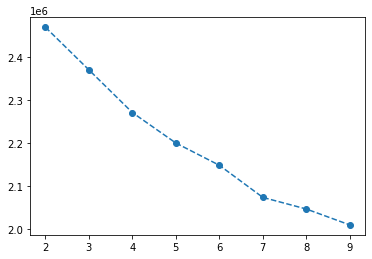

In [81]:
plt.plot(range(2,10),ssd,'o--')

In [82]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.200694e+06
4    2.149009e+06
5    2.074338e+06
6    2.047336e+06
7    2.010388e+06
dtype: float64

In [84]:
pd.Series(ssd).diff()

0             NaN
1   -99005.473248
2   -99283.459385
3   -70809.010077
4   -51684.925371
5   -74671.356161
6   -27002.337189
7   -36947.487045
dtype: float64